In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
df = pd.read_csv(r"C:\Users\SHAHIN\OneDrive\Desktop\ml project\diabetes project\diabetes_dataset.csv")
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
label_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

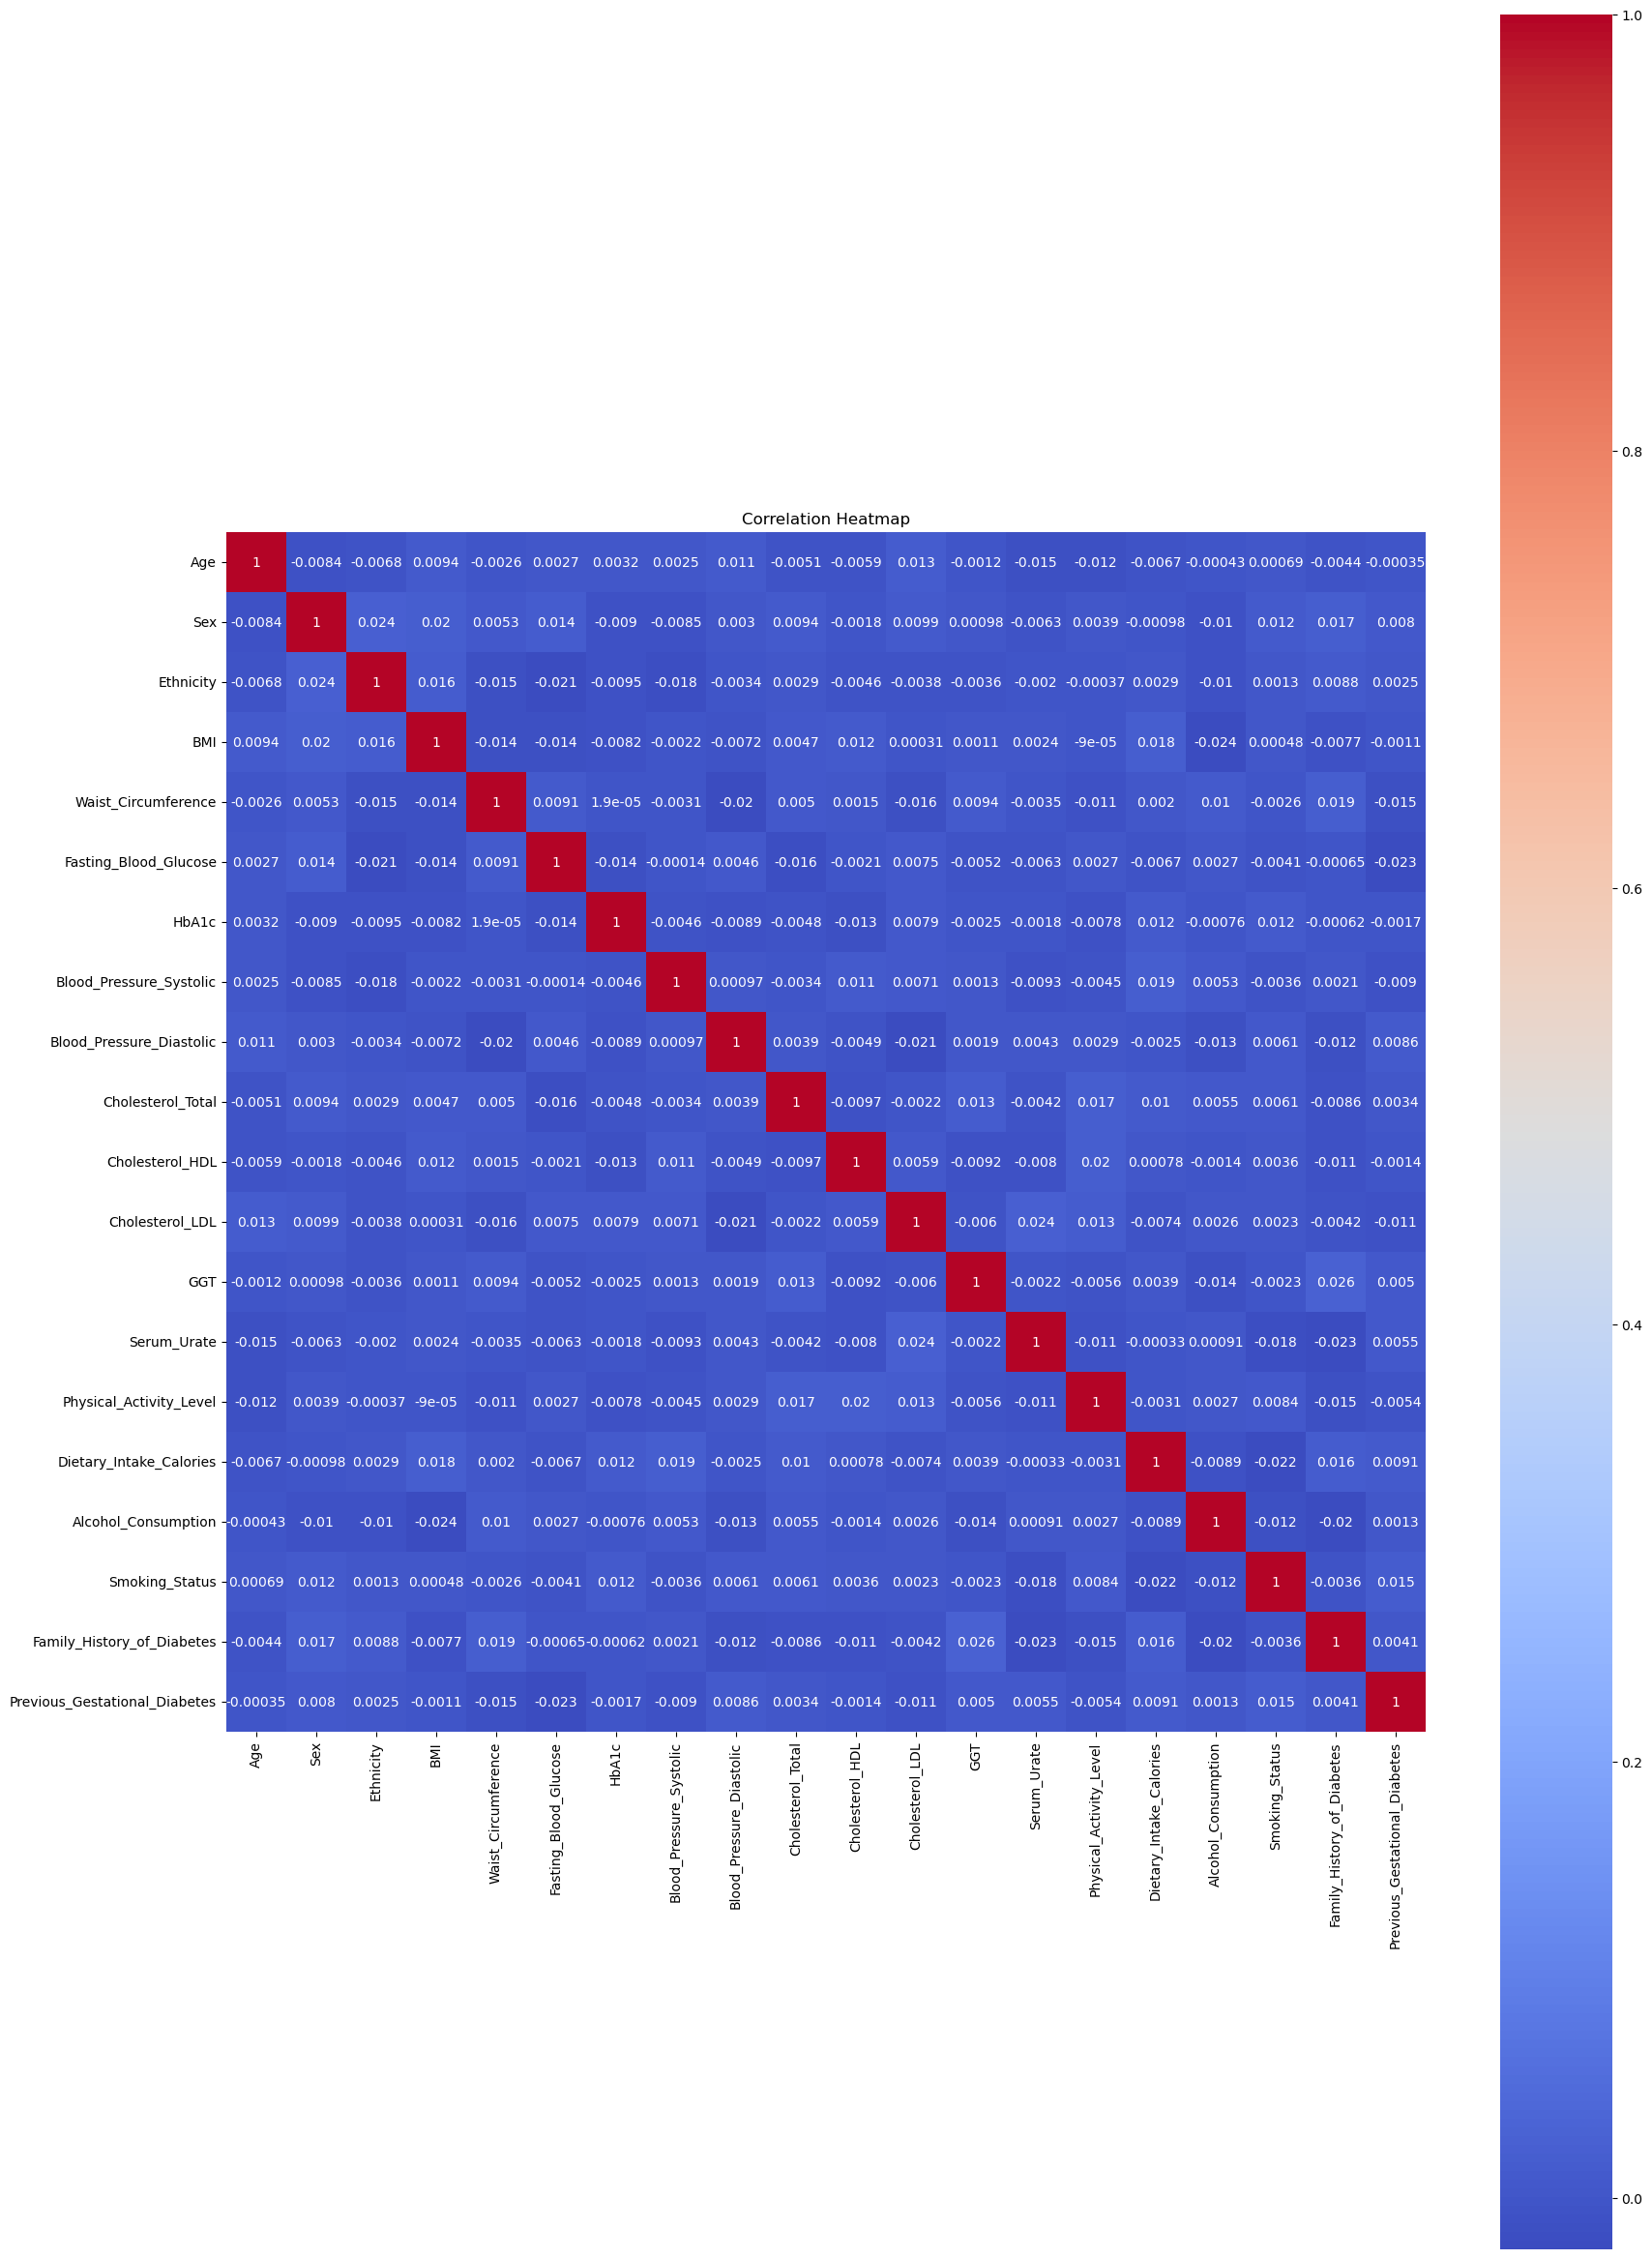

In [20]:
plt.figure(figsize=(20, 30))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [21]:
X = df.drop(columns=["Previous_Gestational_Diabetes"])
y = df["Previous_Gestational_Diabetes"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

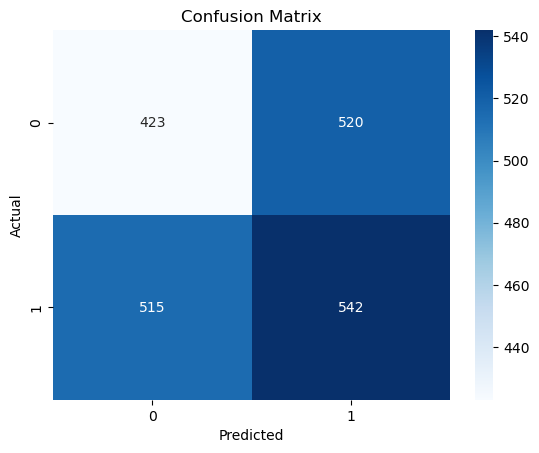

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

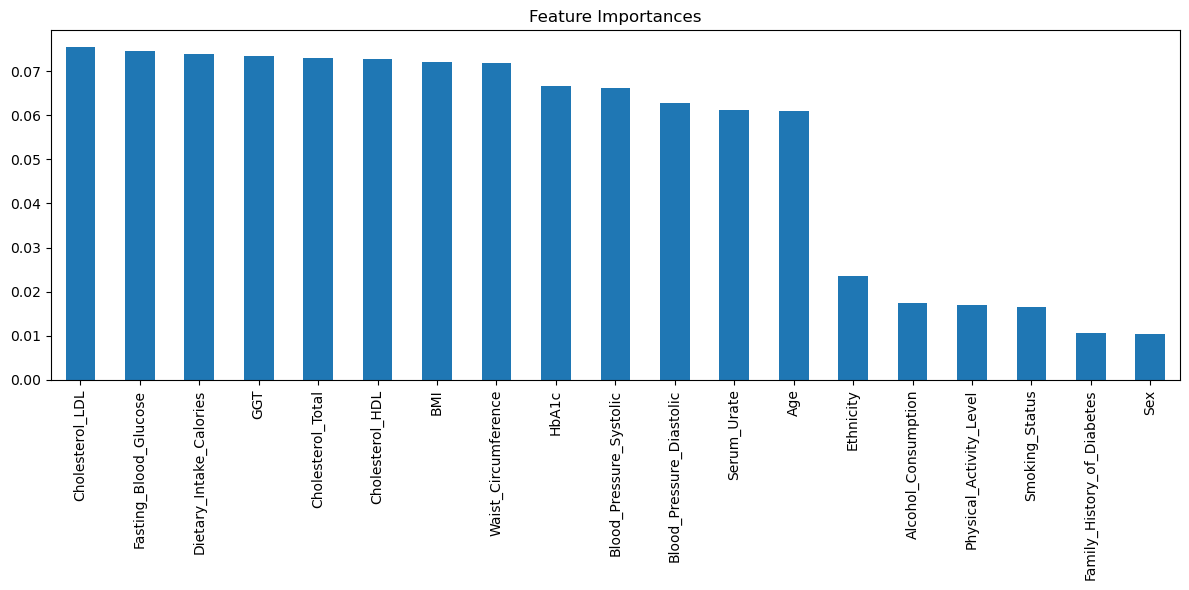

In [26]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importances")
plt.tight_layout()
plt.show()